# SEABORN
Statistical plotting library  
Built on Matpolotlib


# Distribution Plots

In [122]:
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [123]:
# Read data set
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


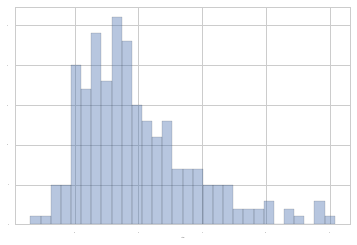

In [124]:
# Create histogram to visualize distribution for univariate data
sns.distplot(tips['total_bill'],kde = False, bins = 30, axlabel = 'Total Bill') # removes kernal density estimation 

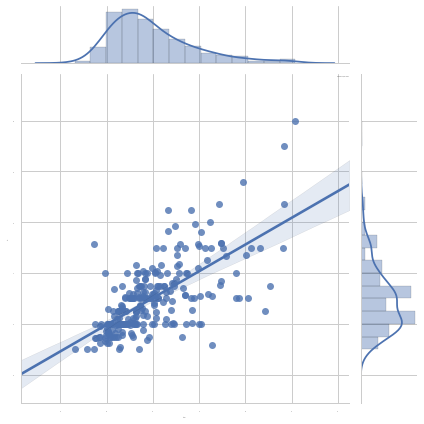

In [125]:
# Create joint plot to visualize bivariate data
sns.jointplot(x ='total_bill' ,y='tip' , data = tips, kind = 'reg')

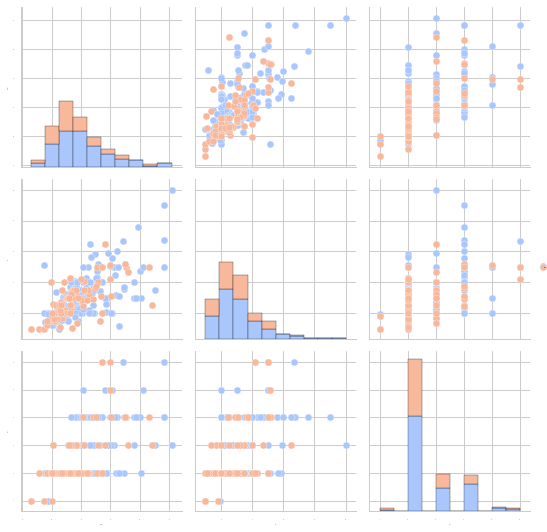

In [126]:
# Create pairplot to cresate joint plot for every combo of numerical columns in the dataframe
sns.pairplot(tips, hue = 'sex', palette= 'coolwarm')  # pass a categorical column to hue

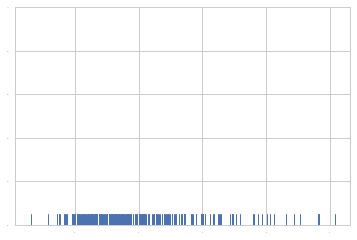

In [127]:
# Create rug plot 
sns.rugplot(tips['total_bill'])

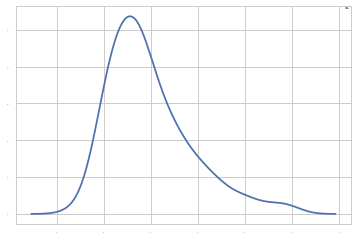

In [128]:
# Create kde plot
sns.kdeplot(tips['total_bill'])

# Categorical Plots

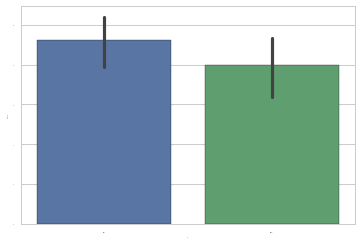

In [129]:
# Create bar plot
import numpy as np
sns.barplot(x ='sex' ,y = 'total_bill',data = tips, estimator = np.std) #default is mean

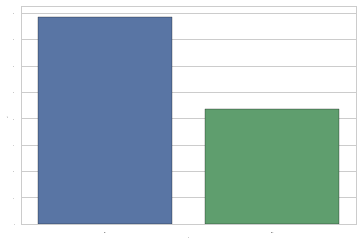

In [130]:
# Create count plot
sns.countplot(x= 'sex', data = tips) # same as bar plot except y axis already chosen

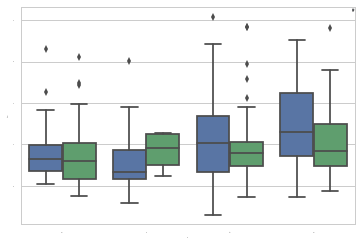

In [131]:
# Create box plot 
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker') # x is categorical, y is numerical

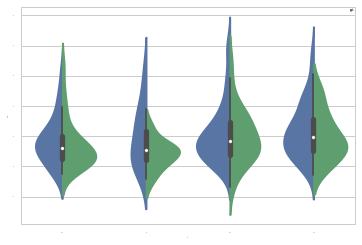

In [132]:
# Create violin plot
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

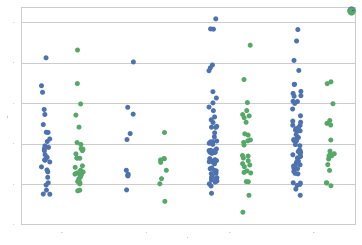

In [133]:
# Strip plot 
sns.stripplot(x = 'day', y = 'total_bill', data= tips, jitter = True, hue = 'sex', split = True) # similiar to scatter plot but one variable is categorical

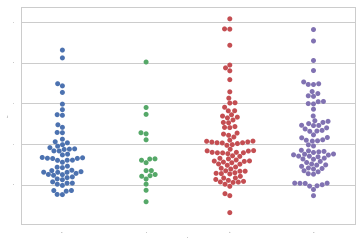

In [134]:
# Create swarmplot
sns.swarmplot(x = 'day', y = 'total_bill', data = tips) # combo of violin plot and stripplot but the points don't overlap

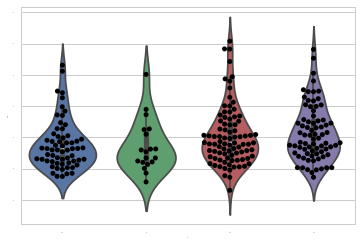

In [135]:
# Create swarmplot
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

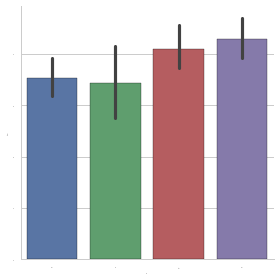

In [136]:
# Use more general factorplot method to create a plot
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

# Matrix Plots

### Heat Maps


In [137]:
import seaborn as sns
%matplotlib inline

# Load data sets
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [138]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [139]:
# Tranform dataset into matrix form
tc = tips.corr() 
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


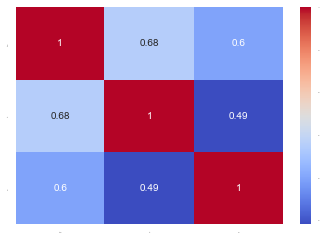

In [140]:
# Create heat map
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [141]:
# View flights data
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [142]:
# Transform data to matrix form by converting a variable column into the index
fp =flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


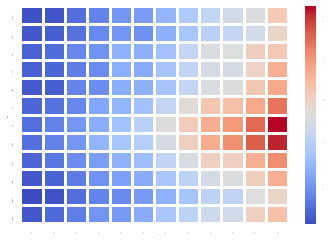

In [143]:
# Create heat map
sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white',linewidths = 2)

### Cluster Maps

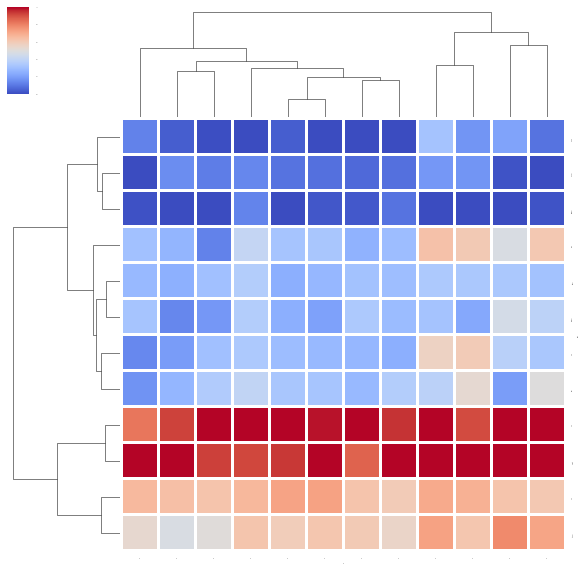

In [144]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

sns.clustermap(fp, cmap = 'coolwarm',linecolor = 'white', linewidth = 2, standard_scale = 1)

# Regression Plots

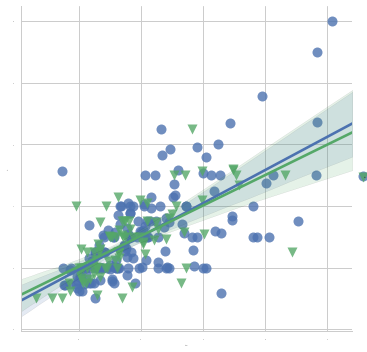

In [145]:
# Create linear model plot
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','v'],
          scatter_kws = {'s':100})

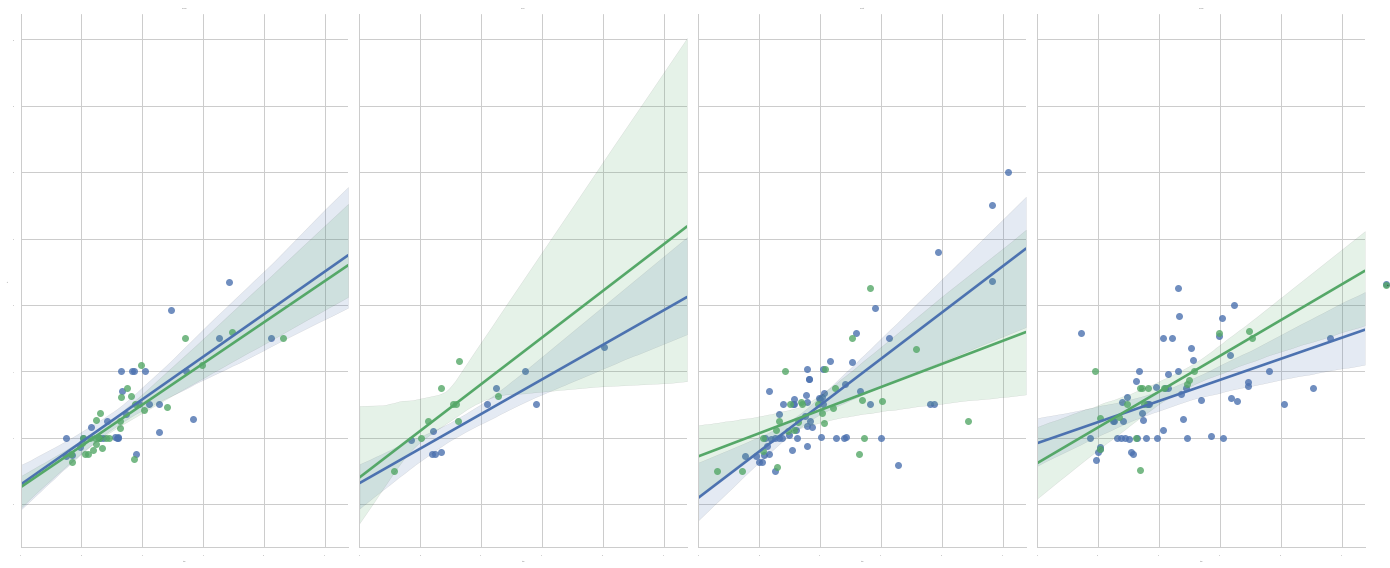

In [146]:
# Create faceted plot
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex',
          aspect = 0.6, size = 8)

# Grids

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [148]:
# Identify unique values Species column
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

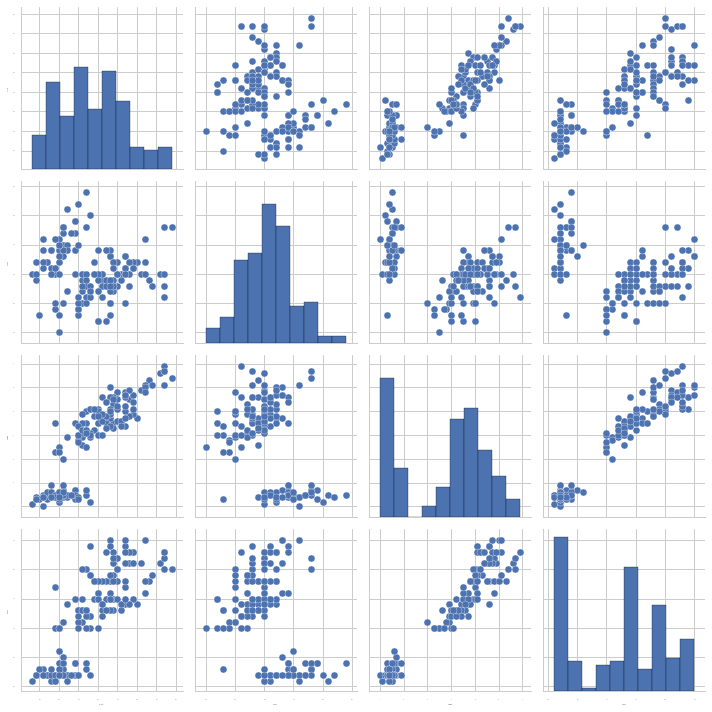

In [149]:
# Create pair plot
sns.pairplot(iris)

### Pair Grid

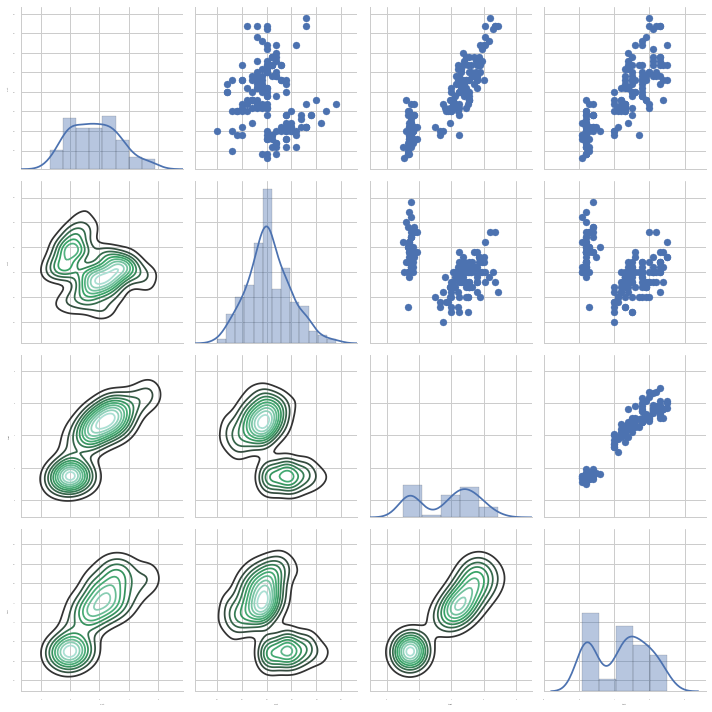

In [150]:
# Create pair grid
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [151]:
# Load dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Facet Grid

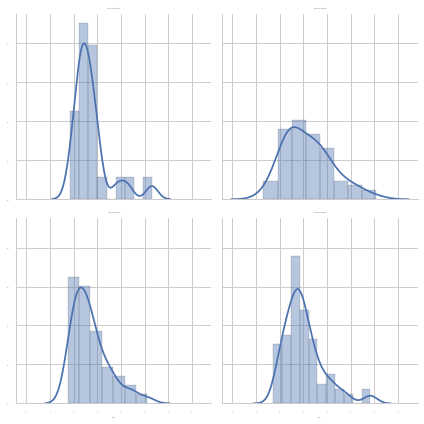

In [152]:
# Create facet grid
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot,'total_bill')

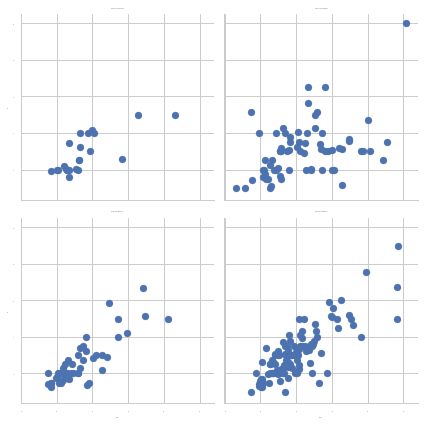

In [153]:
# Create facet grid with plot require more than one variable
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter,'total_bill','tip')

# Style and Color

In [154]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Style

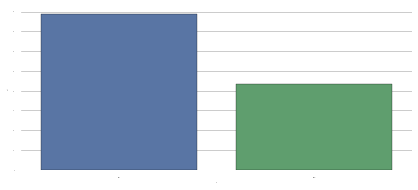

In [155]:
# Set style 
sns.set_style('whitegrid') # will remain until you change it
plt.figure(figsize = (7,3))
sns.countplot(x = 'sex', data = tips)

# Remove spines
sns.despine(left = True, bottom = True)

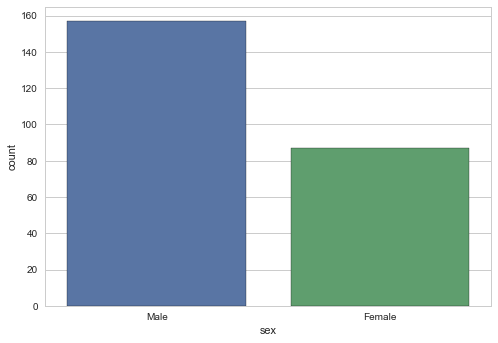

In [170]:
# Set context
sns.set_context('notebook',font_scale = 1) # default is notebook

# Plot
sns.countplot(x = 'sex', data = tips)

### Color

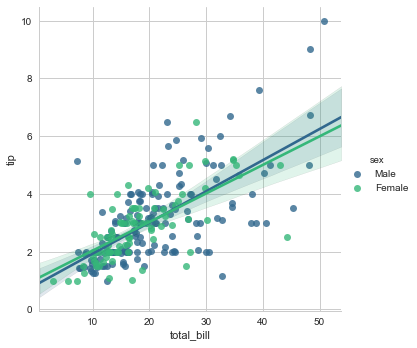

In [171]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'viridis')

# EXERCISES

In [172]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

# Load data
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [173]:
# Set style
sns.set_style('whitegrid')

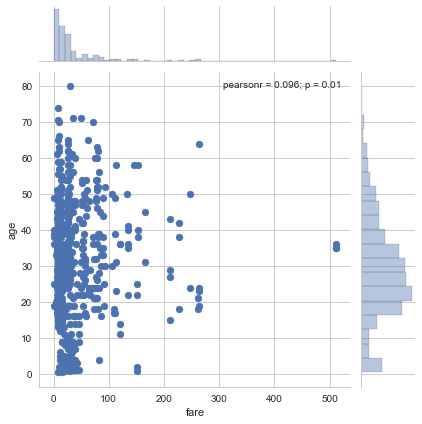

In [174]:
# Create joint distribution plot
sns.jointplot(x = 'fare', y = 'age', data = titanic)

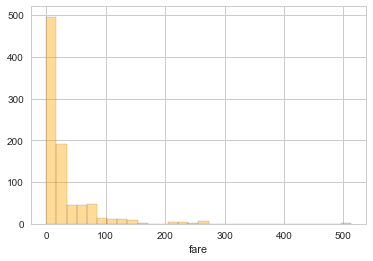

In [175]:
# Create histogram
sns.distplot(titanic['fare'], kde = False, color = 'orange',  bins = 30)

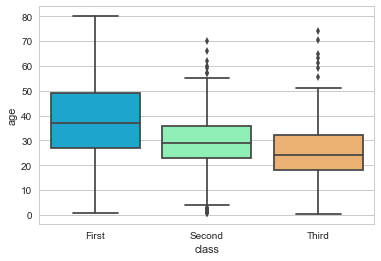

In [176]:
# Create box plot
sns.boxplot(x = 'class', y = 'age', data = titanic, palette = 'rainbow')

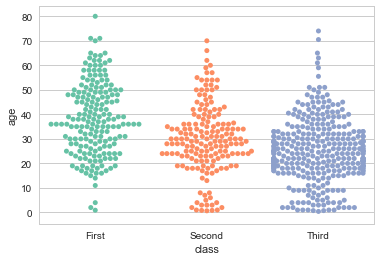

In [177]:
# Create swarm plot
sns.swarmplot(x = 'class', y = 'age', data = titanic, palette = 'Set2')

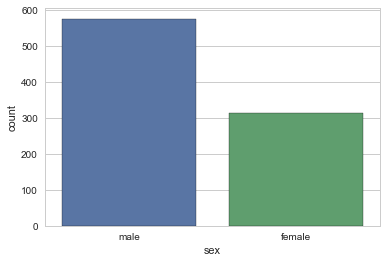

In [178]:
# Create count plot
sns.countplot(x = 'sex', data = titanic)

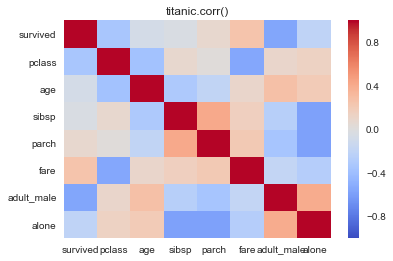

In [179]:
# Create correlation plot
sns.heatmap(titanic.corr(),cmap = 'coolwarm')
plt.title('titanic.corr()')

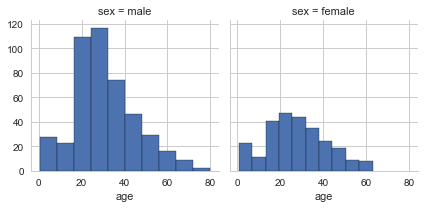

In [182]:
# Create facet grid of histogram
g = sns.FacetGrid(data = titanic, col = 'sex')
g.map(plt.hist, 'age')

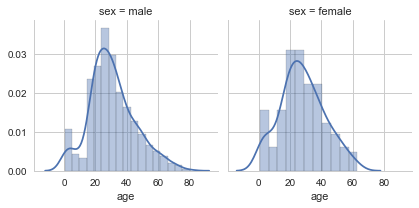

In [183]:
# Create facet grid of distribution plot
g = sns.FacetGrid(data = titanic, col = 'sex')
g.map(sns.distplot, 'age')